# Basic Graph Assignment

In [53]:
"""keeps graphs in Jupyter workbook"""

%matplotlib inline 

In [54]:
'''Imports packages needed to graph data'''

import matplotlib.pyplot as plt
import pandas as pd

## Opioids VA Graphs

In [55]:
df_opioidsVA = pd.read_csv('OpioidsVA.csv') #reads csv into dataframe
df_opioidsVA

,FIPSCode,CountyName,FFHO-Rate,FPOO-Rate,HIV-Rate,MedianHouseholdIncome
0,51001,Accomack,12.1,12.1,3.0,39040
1,51003,Albemarle,0.9,0.9,2.8,73132
2,51005,Alleghany,6.4,12.8,6.4,47037
3,51007,Amelia,7.7,0.0,7.7,56172
4,51009,Amherst,3.2,6.3,6.3,46497
...,...,...,...,...,...,...
128,51800,Suffolk,4.5,4.5,15.7,65025
129,51810,Virginia Beach,12.4,6.4,13.9,70596
130,51820,Waynesboro,0.0,0.0,4.6,41255
131,51830,Williamsburg,13.1,0.0,6.6,49231


### Questions
- Do opioid overdoes tend to be associated with less affluent areas—that is, areas where families have lower incomes?
- Some people who start with opioid addictions are reported to transition to heroin use. What is the relationship in Virginia counties between opioid overdoses and heroin overdoses? 

#### Opioid Overdose Rates vs Income Levels

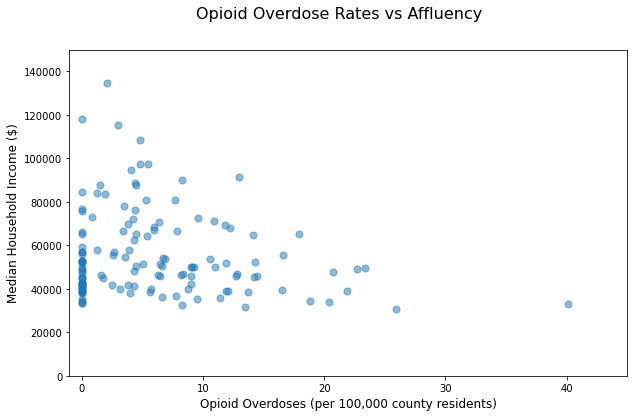

In [56]:
fig,ax = plt.subplots()

'''a scatter plot was chosen to show correlation between the two variables'''

ax.scatter(df_opioidsVA['FPOO-Rate'], df_opioidsVA['MedianHouseholdIncome'], alpha = .5, s = 50)
fig.suptitle('Opioid Overdose Rates vs Affluency', fontsize = 16)
ax.xaxis.set_label_text('Opioid Overdoses (per 100,000 county residents)', fontsize = 12)
ax.yaxis.set_label_text('Median Household Income ($)', fontsize = 12)
ax.set_xlim(-1, 45)
ax.set_ylim(0, 150000)
fig.set_size_inches(10,6)
plt.show()

#### Opioid Overdose Rates vs Heroin Overdose Rates

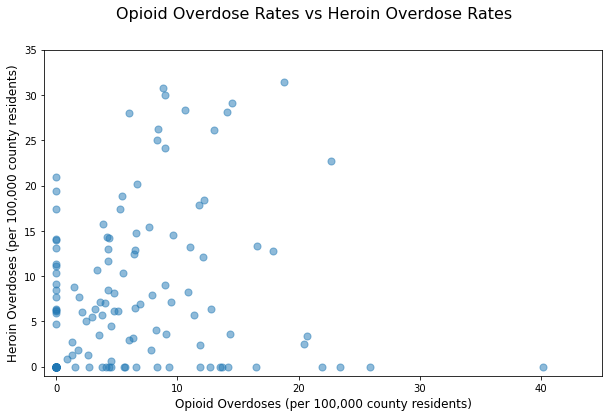

In [57]:
fig,ax = plt.subplots()

'''a scatter plot was chosen to show correlation between the two variables'''

ax.scatter(df_opioidsVA['FPOO-Rate'], df_opioidsVA['FFHO-Rate'], alpha = .5, s = 50)
fig.suptitle('Opioid Overdose Rates vs Heroin Overdose Rates', fontsize = 16)
ax.xaxis.set_label_text('Opioid Overdoses (per 100,000 county residents)', fontsize = 12)
ax.yaxis.set_label_text('Heroin Overdoses (per 100,000 county residents)', fontsize = 12)
ax.set_xlim(-1, 45)
ax.set_ylim(-1, 35)
fig.set_size_inches(10,6)
plt.show()

### Answers
- As shown in the upper scatter plot, the most affluent areas tend to have less opioid overdose rates while middle and low affluent areas have a higher rate of opioid overdoses. However this is not a strong correlation.
- As shown in the lower scatter plot, there is a very weak correlation between opioid overdose rates and heroin overdose rates.

## Presidents and their Birthplaces

In [58]:
df_presidents = pd.read_csv('presidents.csv') #reads csv into dataframe
df_presidents

,Name,Location,State
0,George Washington,Westmoreland County,Virginia
1,John Adams,Braintree,Massachusetts
2,Thomas Jefferson,Shadwell,Virginia
3,James Madison,Port Conway,Virginia
4,James Monroe,Monroe Hall,Virginia
5,Andrew Jackson,Waxhaws Region,South/North Carolina
6,John Quincy Adams,Braintree,Massachusetts
7,William Henry Harrison,Charles City County,Virginia
8,Martin Van Buren,Kinderhook,New York
9,Zachary Taylor,Barboursville,Virginia


### Questions
- Which states are associated with the greatest number of United States presidents in terms of the presidents’ birthplaces?

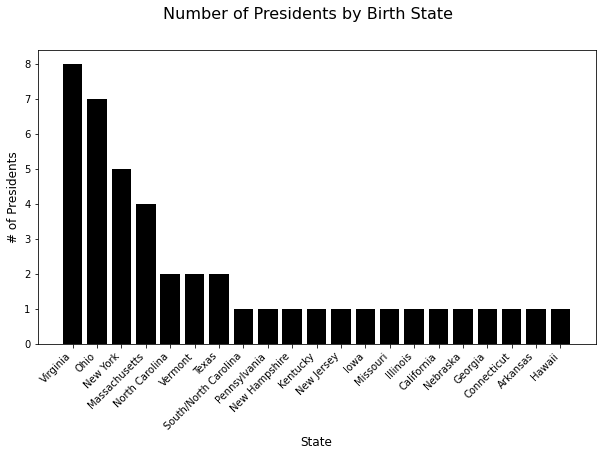

In [59]:
'''changes the dataframe column into a dictionary key and counts the occurences of that key in the dataframe column'''

states = df_presidents['State'].unique().tolist()
statesDict = {state: 0 for state in states}
for state in df_presidents['State']:
    statesDict[state] += 1
statesList = list(statesDict.items())
statesList =[list(states) for states in statesList]
statesList.sort(key = lambda x:x[1], reverse = True)
x = [state for [state, freq] in statesList]
y = [freq for [state, freq] in statesList]

fig,ax = plt.subplots()

'''Due to needing to know the count of presidents from each state a histogram will be used'''

ax.bar(x, y, align = 'center', color = 'k')
fig.suptitle('Number of Presidents by Birth State', fontsize = 16)
ax.xaxis.set_label_text('State', fontsize = 12)
ax.yaxis.set_label_text('# of Presidents', fontsize = 12)
fig.autofmt_xdate(rotation = 45)
fig.set_size_inches(10, 6)
plt.show()

### Answer
- Virginia, Ohio and New York have had the greatest number of presidents born in them.

## US Vehicle Sales

In [60]:
df_usVehSales = pd.read_csv('TOTALNSA.csv') #reads csv into dataframe
df_usVehSales

,DATE,TOTALNSA
0,1976-01-01,885.200
1,1976-02-01,994.700
2,1976-03-01,1243.600
3,1976-04-01,1191.200
4,1976-05-01,1203.200
...,...,...
508,2018-05-01,1626.487
509,2018-06-01,1586.668
510,2018-07-01,1403.206
511,2018-08-01,1521.287


### Questions
- How have vehicle sales in the United States varied over time?

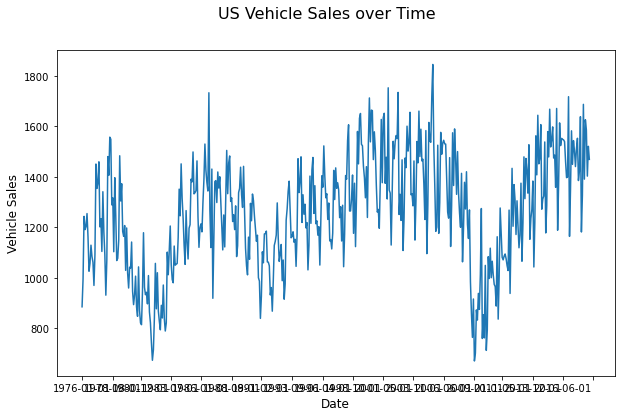

In [66]:
import matplotlib.dates as mdates

month = mdates.MonthLocator()

fig,ax = plt.subplots()

'''since we are dealing with time series data a line graph will be used'''

ax.plot(df_usVehSales['DATE'], df_usVehSales['TOTALNSA'])
fig.suptitle('US Vehicle Sales over Time', fontsize = 16)
ax.xaxis.set_label_text('Date', fontsize = 12)
ax.yaxis.set_label_text('Vehicle Sales', fontsize = 12)
ax.xaxis.set_major_locator(month)
fig.set_size_inches(10, 6)

### Answer
- US Vehicle sales have fluctuated over the years with the most recent dip in sales occurring during the recession in 2008 and a slow rebound since.